1. Φόρτωση Δεδομένων: Φορτώστε τα δεδομένα Iris χρησιμοποιώντας
τη συνάρτηση load_iris του scikit-learn. Διαχωρίστε τα δεδομένα σε
χαρακτηριστικά (X) και ετικέτες (y).

In [57]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X.shape, y.shape


((150, 4), (150,))

2. Διαχωρισμός Δεδομένων: Διαχωρίστε τα δεδομένα σε σύνολα
εκπαίδευσης και ελέγχου χρησιμοποιώντας τη συνάρτηση
train_test_split του scikit-learn

In [58]:
from sklearn.model_selection import train_test_split

parameters = {
    'test_size': 0.2,
    'random_state': 42,
    'shuffle': True
    }

X_train, X_test, y_train, y_test = train_test_split(X, y, **parameters)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((120, 4), (30, 4), (120,), (30,))

3. Εφαρμογή Μεθόδων Κανονικοποίησης: Εφαρμόστε τρεις
διαφορετικές μεθόδους κανονικοποίησης:
• StandardScaler
• MinMaxScaler
• RobustScaler


In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

scaler_min_max = MinMaxScaler()
X_train_min_max = scaler_min_max.fit_transform(X_train)
X_test_min_max = scaler_min_max.transform(X_test)

scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)


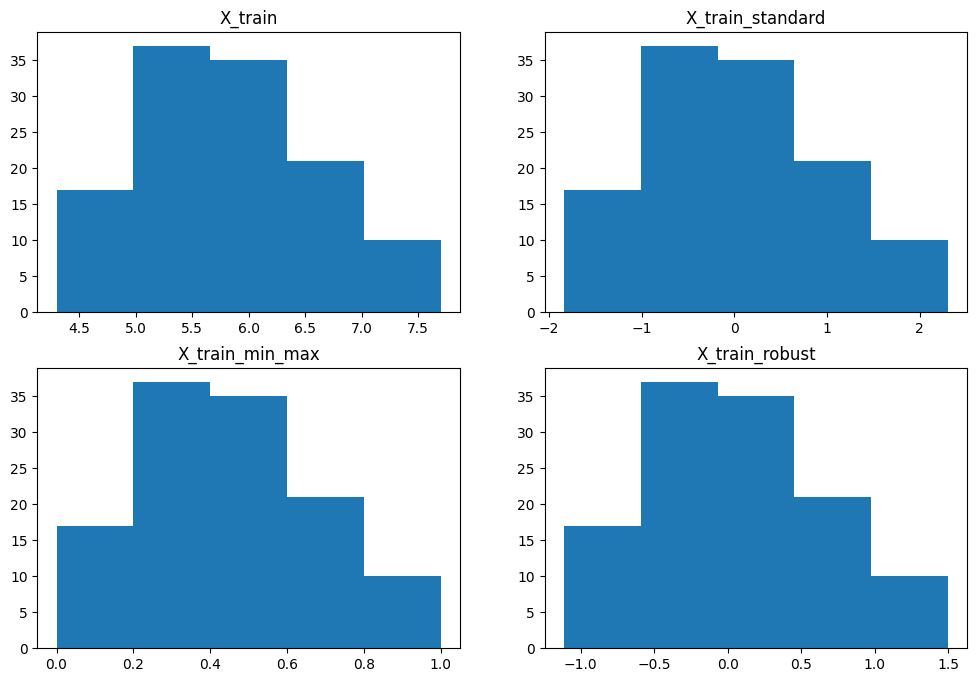

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
#plt.subplots(2, 2)

plt.subplot(2, 2, 1)
plt.hist(X_train[:, 0], bins=5)
plt.title('X_train')

plt.subplot(2, 2, 2)
plt.hist(X_train_standard[:, 0], bins=5)
plt.title('X_train_standard')

plt.subplot(2, 2, 3)
plt.hist(X_train_min_max[:, 0], bins=5)
plt.title('X_train_min_max')

plt.subplot(2, 2, 4)
plt.hist(X_train_robust[:, 0], bins=5)
plt.title('X_train_robust')
plt.show()

4. Εκπαίδευση Μοντέλου: Εκπαιδεύστε ένα μοντέλο
κατηγοριοποίησης, όπως η λογιστική παλινδρόμηση
(LogisticRegression), σε κάθε ένα από τα κανονικοποιημένα datasets.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_standard = LogisticRegression()
model_standard.fit(X_train_standard, y_train)
y_pred_standard = model_standard.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)

model_min_max = LogisticRegression()
model_min_max.fit(X_train_min_max, y_train)
y_pred_min_max = model_min_max.predict(X_test_min_max)
accuracy_min_max = accuracy_score(y_test, y_pred_min_max)

model_robust = LogisticRegression()
model_robust.fit(X_train_robust, y_train)
y_pred_robust = model_robust.predict(X_test_robust)
accuracy_robust = accuracy_score(y_test, y_pred_robust)

accuracy_standard, accuracy_min_max, accuracy_robust


(1.0, 0.9666666666666667, 1.0)

Φόρτωση του Iris Dataset: Φορτώστε το Iris dataset από το scikitlearn.

In [62]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Διαχωρισμός Δεδομένων: Διαχωρίστε τα δεδομένα σε σύνολα
εκπαίδευσης και ελέγχου χρησιμοποιώντας τη συνάρτηση
train_test_split του scikit-learn.

In [63]:
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

3. Εισαγωγή Ελλιπών Τιμών: Εισάγετε τυχαίες ελλιπείς τιμές (NaN) στα
δεδομένα εκπαίδευσης, ώστε να προσομοιώσετε την απουσία
δεδομένων

In [64]:
import numpy as np

nan_percentage = 0.1

total_values = X_train.size
nan_values = int(total_values * nan_percentage)

nan_indices = np.random.randint(0, X_train.shape[0], nan_values), np.random.randint(0, X_train.shape[1], nan_values)

X_train_nan = X_train.copy()
X_train_nan[nan_indices] = np.nan

np.isnan(X_train_nan).sum()



45

4. Επιλογή Μεθόδων Συμπλήρωσης: Επιλέξτε τρεις διαφορετικές
μεθόδους συμπλήρωσης ελλιπών τιμών που παρέχει το scikit-learn.
Για παράδειγμα, μπορείτε να εξετάσετε τις μεθόδους SimpleImputer,
KNNImputer και IterativeImputer.
5. Εφαρμογή Μεθόδων Συμπλήρωσης: Εφαρμόστε τις επιλεγμένες
μεθόδους συμπλήρωσης

In [65]:
from sklearn.impute import SimpleImputer, KNNImputer

imputer_mean = SimpleImputer(strategy='mean')
X_train_imputed_mean = imputer_mean.fit_transform(X_train_nan)
# print(X_train_imputed_mean[nan_indices])

imputer_knn = KNNImputer(n_neighbors=5)
X_train_imputed_knn = imputer_knn.fit_transform(X_train_nan)
# print(X_train_imputed_knn[nan_indices])

print("Mean value of the difference of imputers " f"{(X_train_imputed_mean[nan_indices] - X_train_imputed_knn[nan_indices]).mean():.2}")
print("Standard deviation of the difference of imputers " f"{(X_train_imputed_mean[nan_indices] - X_train_imputed_knn[nan_indices]).std():.2}")


Mean value of the difference of imputers -0.19
Standard deviation of the difference of imputers 0.88


6. Σύγκριση Αποτελεσμάτων: Συγκρίνετε τα αποτελέσματα των
διαφόρων μεθόδων συμπλήρωσης. Χρησιμοποιήστε μετρικές
αξιολόγησης όπως η ακρίβεια του δέντρου απόφασης.

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_simple = DecisionTreeClassifier()
tree_simple.fit(X_train_imputed_mean, y_train)
y_pred_simple = tree_simple.predict(X_test)
accuracy_simple = accuracy_score(y_test, y_pred_simple)

tree_knn = DecisionTreeClassifier()
tree_knn.fit(X_train_imputed_knn, y_train)
y_pred_knn = tree_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

accuracy_simple, accuracy_knn


(1.0, 1.0)